In [24]:
import random 

random.seed(42) 

In [30]:
import numpy as np
import math 
import matplotlib.pyplot as plt

# Experiment 1: The Naive Stochastic Vs Batch Gradient Descent Battle 

A battle so naive, we're only gonna use python lists, with no fancy library at our disposal!

In [26]:
N = 100  #number of samples 
M = 1   #number of features 

lr = 0.01 
epochs = 10000

In [27]:
X = [random.uniform(0, 10) for _ in range(N)] 
y = [random.uniform(0, 10) for _ in range(N)] 

In [28]:
def calculate_mse(X, y, w, b):
    mse = sum((y - (w * x + b))**2 for x, y in zip(X,y)) / N
    #print("Mean Squared Error: ", mse)
    return mse 
  
def batch_gradient_descent(X, y, lr = 0.01, epochs = 1000):
  w = 0
  b = 0 
  loss = [] 
  for epoch in range(epochs):
    dw = 0 
    db = 0
    for x_i, y_i in zip(X, y):
      dw +=  2 * x_i * ((w * x_i + b) - y_i)
      db += 2 *((w + x_i + b) - y_i)
      
    w = w - lr * (dw / N)
    b = b - lr * (db / N) 

    curr_mse = calculate_mse(X, y, w, b) 
    loss.append(curr_mse) 

    #if epoch > 0 and abs(loss[-1] - loss[-2]) < 1e-6:
      #print(f"Converged at iteration {epoch}")
  return w, b, loss

def stochastic_gradient_descent(X, y, lr = 0.01, epochs = 1000): 
  w = 0 
  b = 0
  loss = [] 
  for epoch in range(epochs):
    dw = 0 
    db = 0 
    for x_i, y_i in zip(X, y):
      dw += 2 * x_i * ((w * x_i + b) - y_i)
      db += 2 * ((w * x_i + b) - y_i)

      w = w - lr * (dw / N) 
      b = b - lr * (db / N) 
    
    curr_mse = calculate_mse(X, y, w, b) 
    loss.append(curr_mse) 
    #if epoch > 0 and abs(loss[-1] - loss[-2]) < 1e-6:
      #print(f"Converged at iteration {epoch}")
      
  return w, b, loss



In [29]:
print("====Batch Gradient Descent====")
w_1, b_1, loss_1 = batch_gradient_descent(X, y, lr = 0.01, epochs = 1000)
print(f"Final w: {w_1}, b: {b_1}")
mse_val_1 = calculate_mse(X, y, w_1, b_1) 
print("MSE: ", mse_val_1)

print("\n====Stochastic Gradient Descent====")
w_2, b_2, loss_2 = stochastic_gradient_descent(X, y, lr = 0.01, epochs = 1000)
print(f"Final w: {w_2}, b: {b_2}")
mse_val_2 = calculate_mse(X, y, w_2, b_2) 
print("MSE: ", mse_val_2)

====Batch Gradient Descent====
Final w: 0.8614500420379271, b: -0.7683562903414622
MSE:  17.049340922498708

====Stochastic Gradient Descent====
Final w: -0.19821748008573786, b: 5.191444288925051
MSE:  9.306654674157993


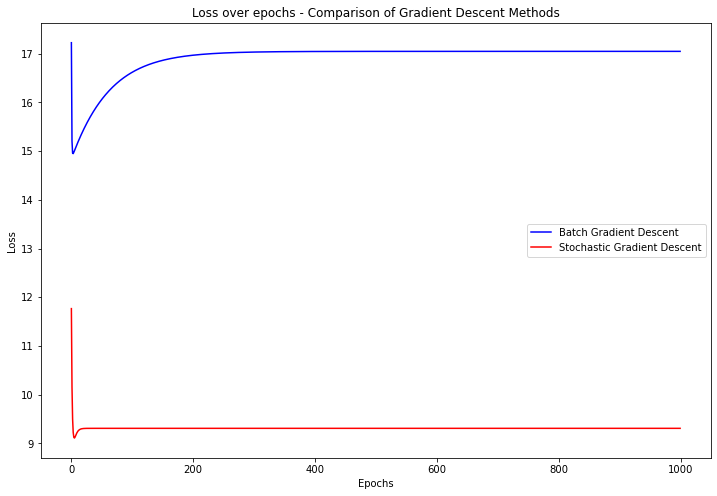

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(loss_1, color='blue', label='Batch Gradient Descent')
plt.plot(loss_2, color='red', label='Stochastic Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs - Comparison of Gradient Descent Methods')
plt.legend()
plt.show()

## Observations: 
From the loss vs epochs graphs between the two types of gradient descents these are the major observations: 

1. Both SGD and Batch GD have a initial sharp decrease in loss. 
2. Stochastic gradient descent seems to converge quicker than Batch gradient descent for a set of 100 values. 
3. Batch GD has a smooth curve towards convergence, while SGD's line is much more noisy. This is probably because the gradients are updated over every individual data point, here, Batch GD seems to have a much more stable convergence over SGD as SGD seems to fluctuate a little bit over the epochs. 
4. SGD performance seems to be better anyways, cause the MSE(SGD) <  MSE(Batch GD) 

# Experiment 2: Sizing up the values to a 10000 samples, while maintaining the same uniform distribution in the range of (0, 10) 





In [34]:

N_1 = 10000 #number of samples 
M = 1  
lr_1= 0.01 
epochs_1 = 10000 
X_1 = [random.uniform(0, 10) for _ in range(N_1)] 
y_1 = [random.uniform(0, 10) for _ in range(N_1)]   


In [35]:
%timeit 

print("====Batch Gradient Descent====")
w_1_1, b_1_1, loss_1_1 = batch_gradient_descent(X_1, y_1, lr = 0.01, epochs = 10000)
print(f"Final w: {w_1_1}, b: {b_1_1}")
mse_val_1_1 = calculate_mse(X_1, y_1, w_1_1, b_1_1) 
print("MSE: ", mse_val_1_1)

print("\n====Stochastic Gradient Descent====")
w_2_1, b_2_1, loss_2_1 = stochastic_gradient_descent(X_1, y_1, lr = 0.01, epochs = 10000)
print(f"Final w: {w_2_1}, b: {b_2_1}")
mse_val_2_1 = calculate_mse(X_1, y_1, w_2_1, b_2_1) 
print("MSE: ", mse_val_2_1)

====Batch Gradient Descent====


OverflowError: (34, 'Result too large')

## Cause of Overflow Error
1. 10000 linear samples, with the uniform distribution within the same (0, 10) range, some of them are gonna be so tiny. 
2. No wonder why we have an overflow error, due to the scale of the data. 

## Ways to mitigate overflow 
1. Normalizing the data with Sklearn Standard Scaler 
2. Reducing the learning rate to 0.00001 
3. Changing data values to float64.
4. Gradient Clipping to prevent the gradients from being too large. 
5. Using a different loss function like Mean Absolute Error instead of a Mean Sqaured Error, which might be less prone to overflow. 
6. Early Stopping 


Experimenting All of them! 


### Mitigation 2: Reducing Learning Rate to 0.00001 

We will start with Mitigation 2, cause Mitigation 1, involves an external library that I do not want to entertain in my code as of now. 

In [36]:
N_1 = 10000 #number of samples 
M = 1  
lr_1= 0.01 
epochs_1 = 10000 


In [45]:
%%time

print("====Batch Gradient Descent====")
w_1_1, b_1_1, loss_1_1 = batch_gradient_descent(X_1, y_1, lr = 0.0001, epochs = 10000)
print(f"Final w: {w_1_1}, b: {b_1_1}")
mse_val_1_1 = calculate_mse(X_1, y_1, w_1_1, b_1_1) 
print("MSE: ", mse_val_1_1)
print("==== time ====")


====Batch Gradient Descent====
Final w: 0.8877427978272352, b: -0.867574668786744
MSE:  1686.724962370719
==== time ====
CPU times: user 31.7 s, sys: 48.9 ms, total: 31.7 s
Wall time: 32.2 s


In [46]:
%%time 
print("\n====Stochastic Gradient Descent====")
w_2_1, b_2_1, loss_2_1 = stochastic_gradient_descent(X_1, y_1, lr = 0.0001, epochs = 10000)
print(f"Final w: {w_2_1}, b: {b_2_1}")
mse_val_2_1 = calculate_mse(X_1, y_1, w_2_1, b_2_1) 
print("MSE: ", mse_val_2_1)
print("==== time ====")


====Stochastic Gradient Descent====
Final w: -0.3711741898883135, b: 4.711163375282058
MSE:  1433.5299161371313
==== time ====
CPU times: user 43.6 s, sys: 38 ms, total: 43.6 s
Wall time: 44.1 s


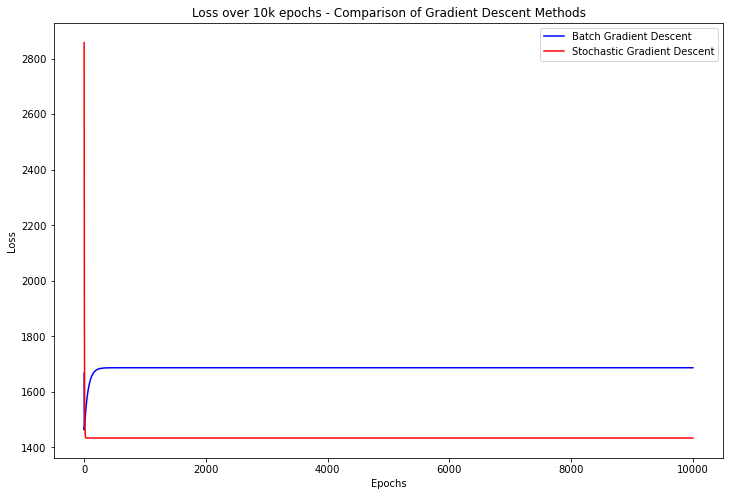

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(loss_1_1, color='blue', label='Batch Gradient Descent')
plt.plot(loss_2_1, color='red', label='Stochastic Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over 10k epochs - Comparison of Gradient Descent Methods')
plt.legend()
plt.show()

Here's what seems to be happening: 
1. Both SGD and Batch GD seem to have different convergence points. 
2. It is entirely possible that Batch GD, got stuck in a local minima, but given the nature of SGD, it might have been able to mitigate this, and reach a more optimal minimum and hence, is the reason why it has a lower MSE. 
3. One thing that could attribute to the high MSE is the fact that the data is NOT SCALED yet. 

To check regarding the scaling, it's important to understand what, scale of data we are actually dealing with currently. Let's convert the current data we have, to a logarithmic scale to understand the scale. 




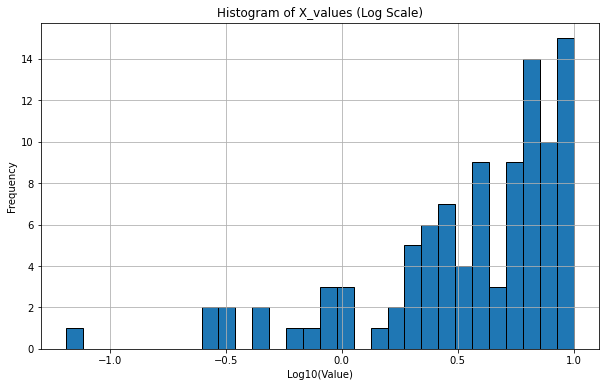

In [39]:
X_values = np.array(X) 
X_log = np.log10(X_values) 
plt.figure(figsize=(10, 6))
plt.hist(X_log, bins=30, edgecolor='black')
plt.xlabel('Log10(Value)')
plt.ylabel('Frequency')
plt.title('Histogram of X_values (Log Scale)')
plt.grid(True)
plt.show()

So, the range of values we have in the input seems to be in the order of 10^-0.6 to 10^1.  
Let's try to scale the data a little bit to center it around the mean. 
The motive for scaling the data in this particular use-case is: 

1. Improved Numerical Stability: We can try to experiment with values that do not get too large or small during computation 
2. Faster Convergence of Gradient Descent and stability in the gradient descent. 

### Mitigation 1: Scaling Values

In [40]:
def get_mean(data):
  return sum(data)/len(data) 

def get_std_dev(data, mean): 
  squared_diff_sum = sum((x-mean)**2 for x in data) 
  return math.sqrt(squared_diff_sum)/len(data)

def standard_scaler(data):
  mean = get_mean(data) 
  std_dev = get_std_dev(data, mean) 

  if std_dev == 0:
    return [0]*len(data) 

  scaled_data = [(x - mean)/std_dev for x in data] 
  return scaled_data

In [41]:
scaled_X = standard_scaler(X_1) 
scaled_y = standard_scaler(y_1)

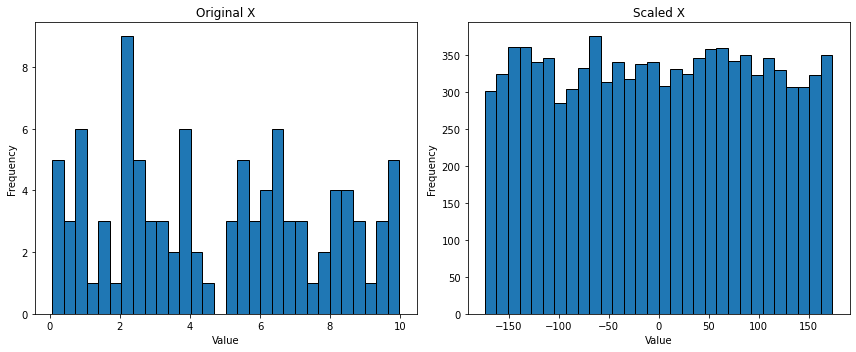

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
ax1.hist(X, bins=30, edgecolor='black')
ax1.set_title('Original X')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Plot scaled data
ax2.hist(scaled_X, bins=30, edgecolor='black')
ax2.set_title('Scaled X')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [43]:
%%time
print("====Batch Gradient Descent On Scaled Data====")
w_1_1, b_1_1, loss_1_1 = batch_gradient_descent(scaled_X, scaled_y, lr = 0.000001, epochs = 10000)
print(f"Final w: {w_1_1}, b: {b_1_1}")
mse_val_1_1 = calculate_mse(X_1, y_1, w_1_1, b_1_1) 
print("MSE: ", mse_val_1_1)
print("====Time Details====")



====Batch Gradient Descent On Scaled Data====
Final w: -5.170169847801276e-14, b: -0.010192673853673393
MSE:  3375.2245311994698
====Time Details====
CPU times: user 32.1 s, sys: 65 ms, total: 32.2 s
Wall time: 32.9 s


In [44]:
%%time
print("\n====Stochastic Gradient Descent====")
w_2_1, b_2_1, loss_2_1 = stochastic_gradient_descent(scaled_X, scaled_y, lr = 0.000001, epochs = 10000)
print(f"Final w: {w_2_1}, b: {b_2_1}")
mse_val_2_1 = calculate_mse(X_1, y_1, w_2_1, b_2_1) 
print("MSE: ", mse_val_2_1)

print("====Time Details====")


====Stochastic Gradient Descent====
Final w: 0.6290169293664607, b: 0.48123095850902164
MSE:  1351.4550916094965
====Time Details====
CPU times: user 44.3 s, sys: 71.7 ms, total: 44.4 s
Wall time: 45.2 s


Since, we're encountering too many overflow errors, it's definitely not optimal to keep shrinking the learning rate. As seen earlier, shrinking the learning rate, is definitely acting as a performance overhead, leading to longer time for convergence. Instead, we'll resort to gradient clipping, Mitigation No. 4 

### Mitigation 4: Gradient Clipping

In [ ]:
def calculate_mse(X, y, w, b):
    mse = sum((y - (w * x + b))**2 for x, y in zip(X,y)) / N
    #print("Mean Squared Error: ", mse)
    return mse 

def generate_data(no_of_samples): 
  for _ in range(no_of_samples):
    x = random.uniform(0, 10) 

  
def batch_gradient_descent(X, y, lr = 0.01, epochs = 1000):
  w = 0
  b = 0 
  loss = [] 
  for epoch in range(epochs):
    dw = 0 
    db = 0
    for x_i, y_i in zip(X, y):
      dw +=  2 * x_i * ((w * x_i + b) - y_i)
      db += 2 *((w + x_i + b) - y_i)
      
    w = w - lr * (dw / N)
    b = b - lr * (db / N) 

    curr_mse = calculate_mse(X, y, w, b) 
    loss.append(curr_mse) 

    #if epoch > 0 and abs(loss[-1] - loss[-2]) < 1e-6:
      #print(f"Converged at iteration {epoch}")
  return w, b, loss

def stochastic_gradient_descent(X, y, lr = 0.01, epochs = 1000): 
  w = 0 
  b = 0
  loss = [] 
  for epoch in range(epochs):
    dw = 0 
    db = 0 
    for x_i, y_i in zip(X, y):
      dw += 2 * x_i * ((w * x_i + b) - y_i)
      db += 2 * ((w * x_i + b) - y_i)

      w = w - lr * (dw / N) 
      b = b - lr * (db / N) 
    
    curr_mse = calculate_mse(X, y, w, b) 
    loss.append(curr_mse) 
    #if epoch > 0 and abs(loss[-1] - loss[-2]) < 1e-6:
      #print(f"Converged at iteration {epoch}")
      
  return w, b, loss



In [2]:
print('Q'*55)

QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ


In [3]:
len('Learning is a treasure that will follow its owner everywhere')

60